##  House price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Observations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking for Outliers
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [8]:
# Method to remove outliers

def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
data.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [11]:
# Grouping columns with null values
null_columns = data.isnull().mean()*100
null_columns = null_columns[null_columns >0]
print(null_columns.sort_values(ascending = False))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


### According to the data dictionary provided, the NA in these columns indicates the absence of facility which may affect the price
### Hence, we will first impute the categorical variables with 'None'

In [12]:
na_cols = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in na_cols:
    data[i].fillna('none', inplace = True)

In [13]:
# Check null values again
null_columns2 = data.isnull().mean()*100
null_columns2 = null_columns2[null_columns2 >0]
print(null_columns2.sort_values(ascending = False))

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64


In [14]:
# Will chcek these cols one by one
for i in null_columns2.keys():
    print(i)
    print(data[i].describe())
    print('---------------')

LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
---------------
MasVnrArea
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
---------------
Electrical
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
---------------
GarageYrBlt
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
---------------


#### As per the data dictionary 'LotFrontage' is Linear feet of street connected to property and it is also a numeric column, it can be imputed with similar 'Neighborhood' values

In [15]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"].dropna(inplace=True)

In [16]:
# Cross check the updated columns
for i in null_columns2.keys():
    print(i)
    print(data[i].describe())
    print('---------------')

LotFrontage
count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
---------------
MasVnrArea
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64
---------------
Electrical
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
---------------
GarageYrBlt
count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
---------------


In [17]:
data.shape

(1460, 81)

## EDA on the data

In [18]:
# Numeric variables
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
# Dropping ID Column
numeric_data = numeric_data.drop(['Id'], axis=1)
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Target variable is 'SalePrice' . So we will plot some variables Vs SalePrice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

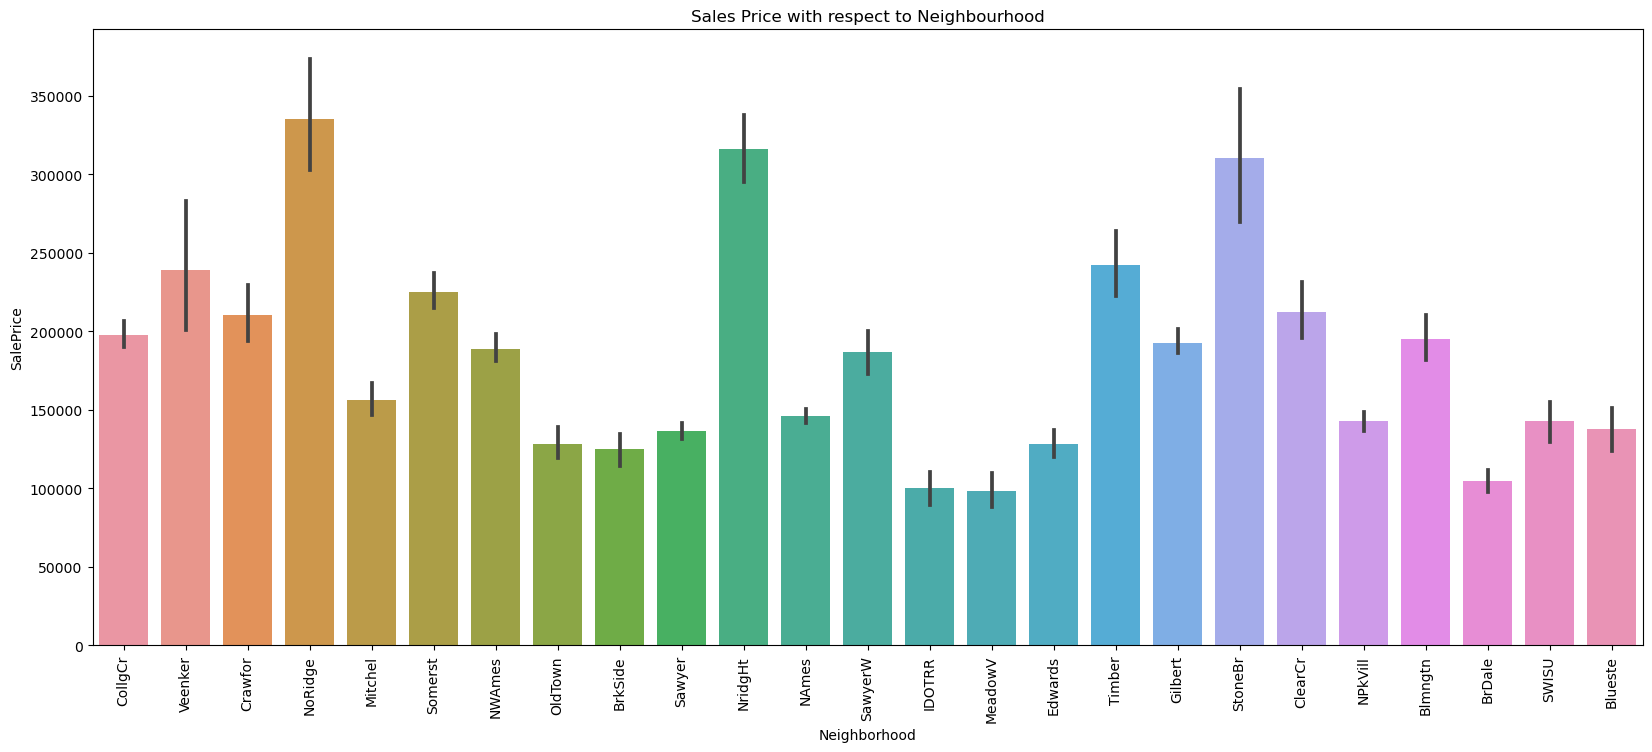

In [20]:
# plot 'SalePrice' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

### Properties in NoRidge, NridgHt, StoneBr are highly priced compared to other areas.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

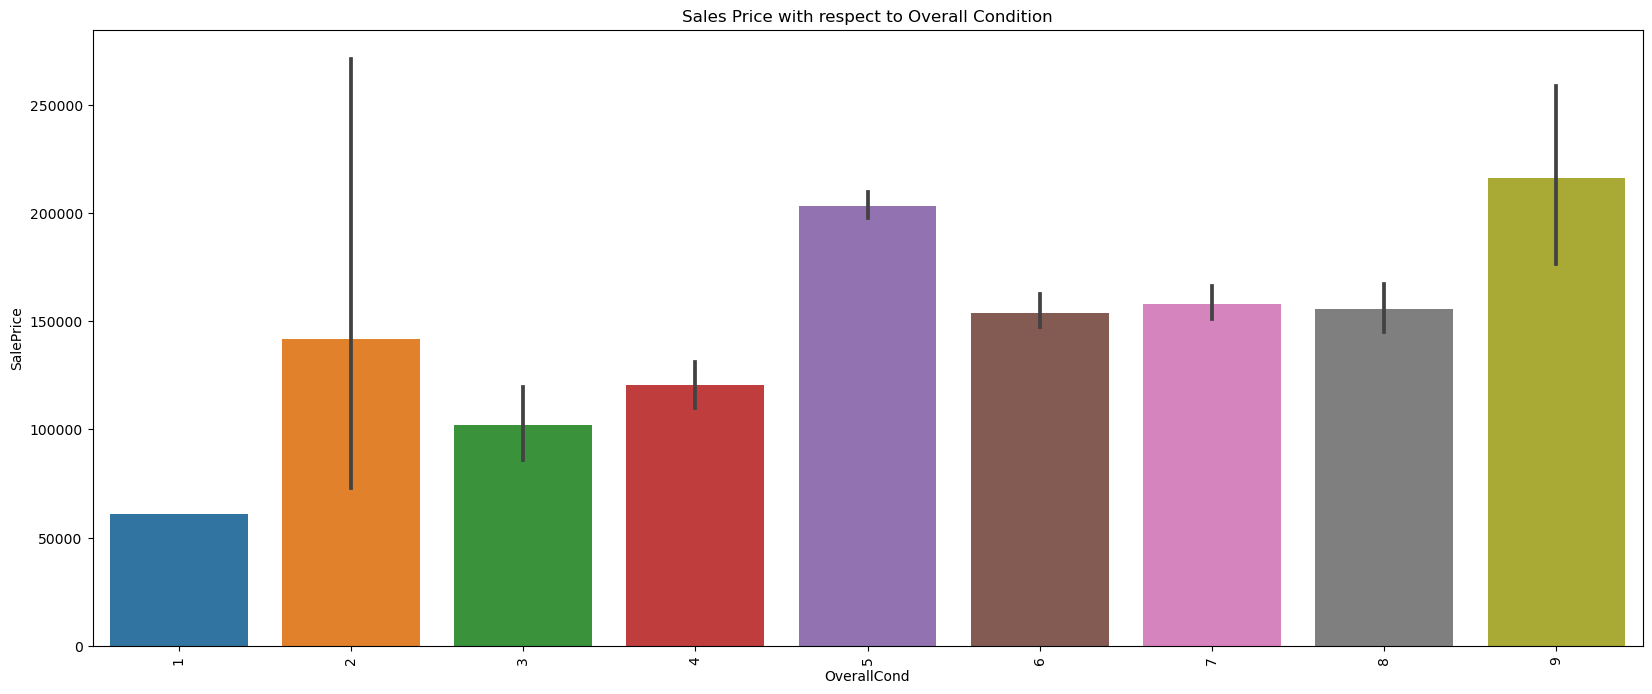

In [21]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

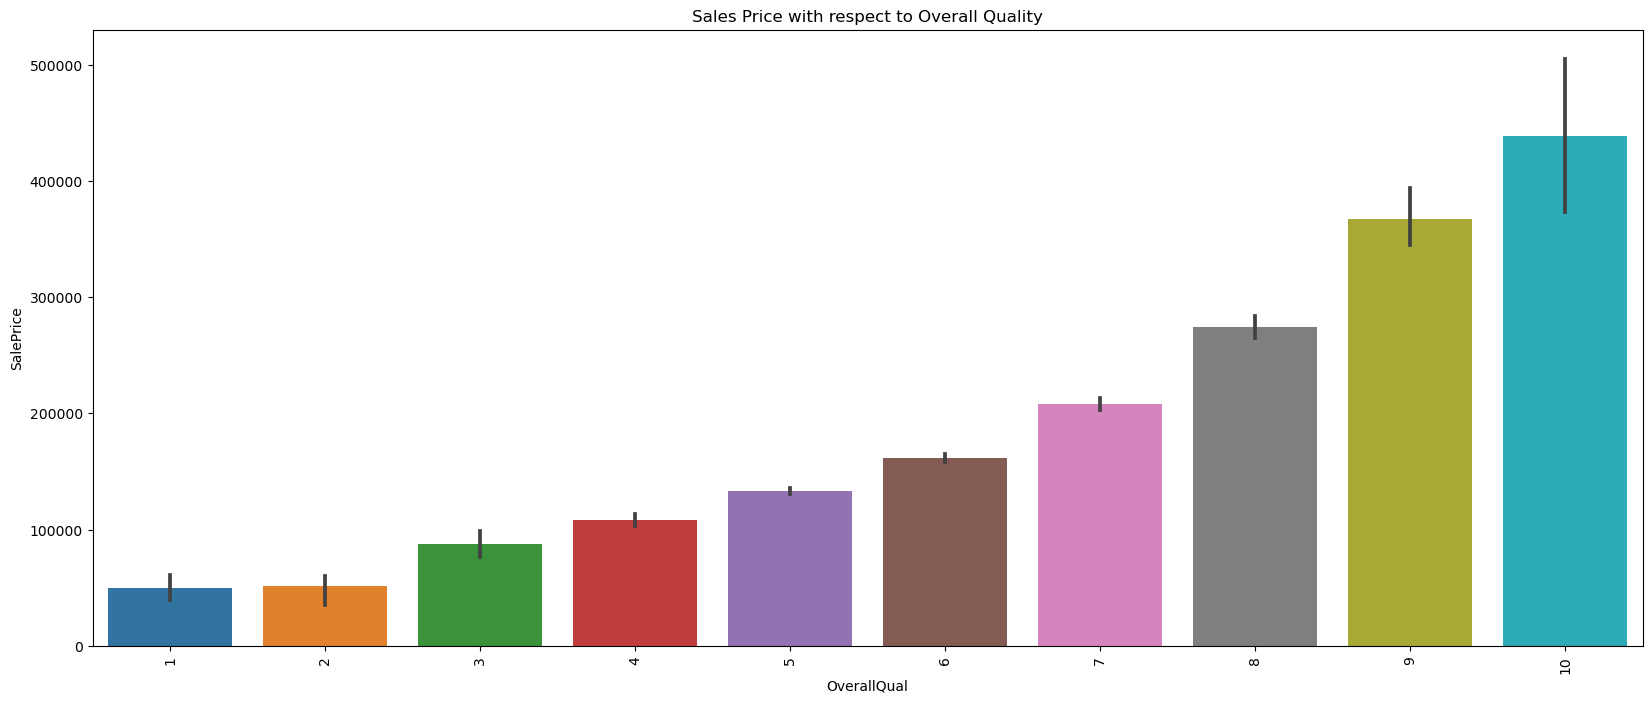

In [22]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

### Overall Good quality properties have higher prices

<Axes: xlabel='SalePrice', ylabel='Density'>

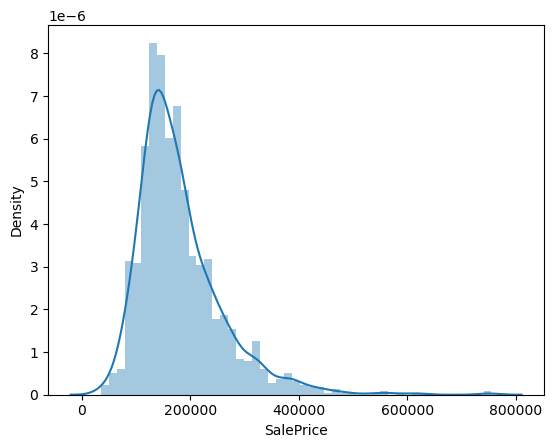

In [23]:
sns.distplot(data['SalePrice'])

### Saleprice distributions are skewed towards left, we will apply the log transformation to obtain a normally distributed data and increase the model performance.

In [24]:
#Log Transformation
data['SalePrice']=np.log(data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

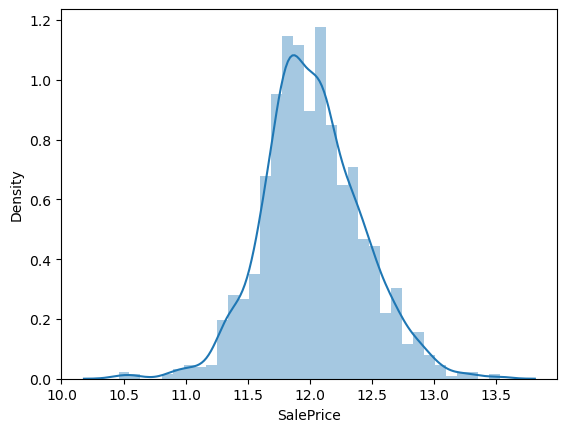

In [25]:
sns.distplot(data['SalePrice'])

In [26]:
# correlation matrix
cor = numeric_data.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


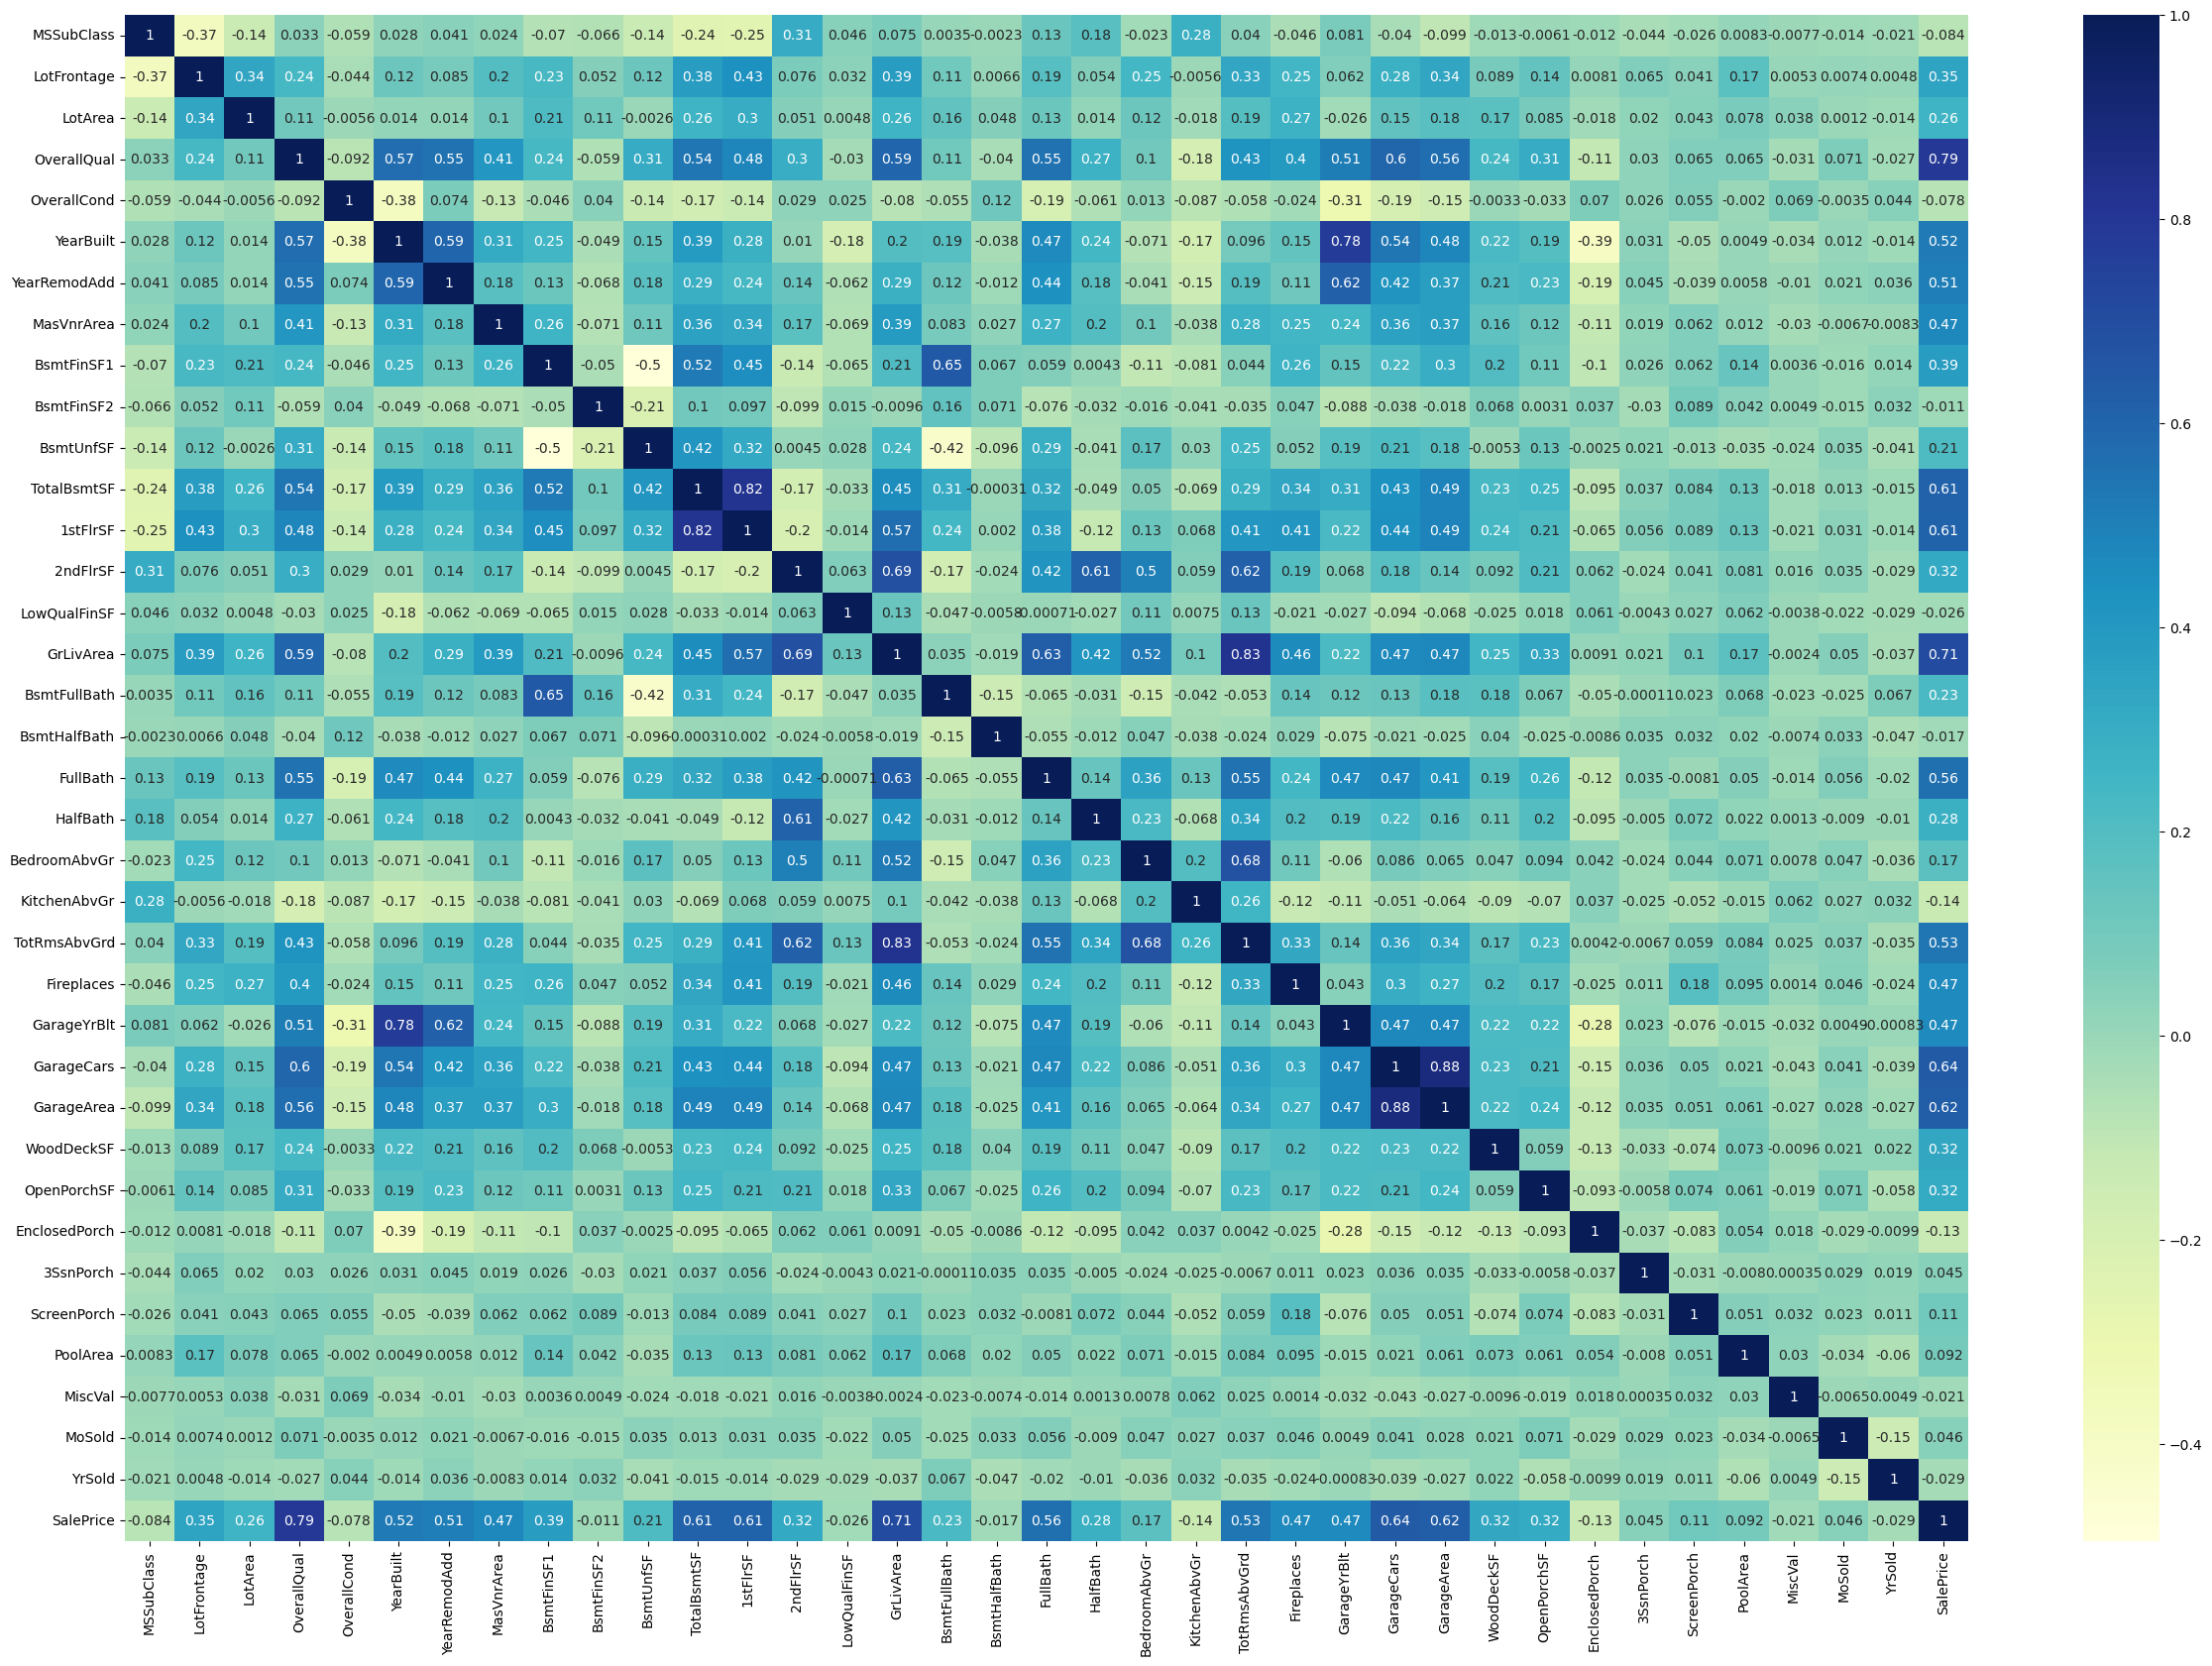

In [27]:
# plotting correlations on a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Some variables are correlated. Removing highly correlated variables and those do not affect the SalePrice


In [28]:
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,12.429216


In [29]:
#Numeric columns
data.select_dtypes(exclude=['object']).shape

(1460, 34)

### Analyse some important numeric columns

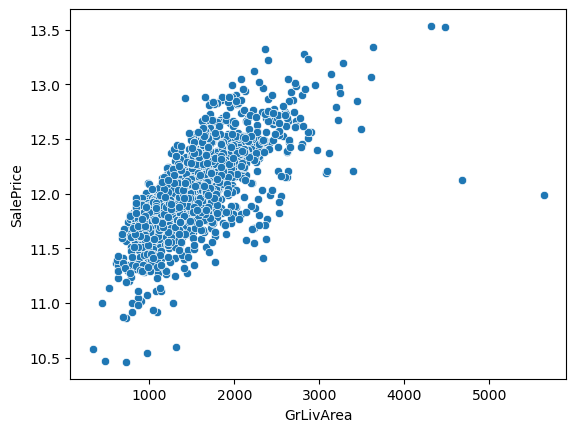

In [30]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [31]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(data,'GrLivArea')

In [32]:
data.shape

(1429, 77)

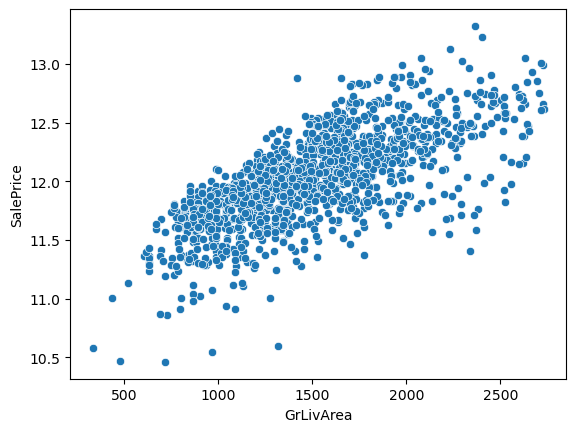

In [33]:
# Again plotting GeLivArea vs SalePrice
sns.scatterplot(x = data['GrLivArea'], y = data['SalePrice'])
plt.show()

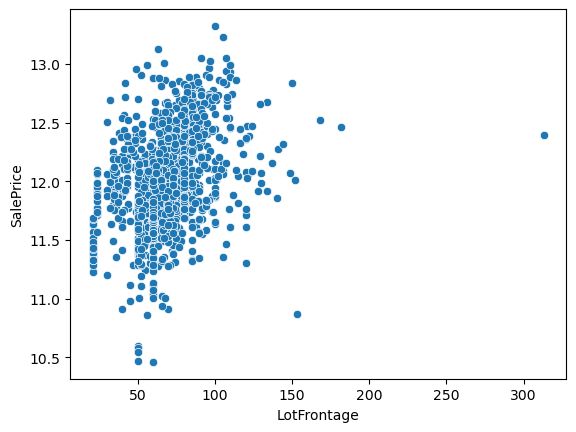

In [34]:
# Lot frontage vs SalePrice 
sns.scatterplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

In [35]:
# We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,2,2008,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,5,2007,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,9,2008,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,2,2006,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,12,2008,WD,Normal,12.429216,8


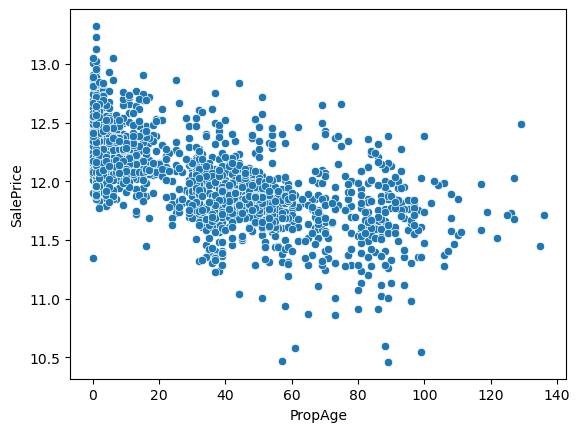

In [36]:
# PropAge vs SalePrice
sns.scatterplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

### Increase in Property Age shows a decreasing saleprice i.e newer the property, high is the value


In [37]:
# Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.429216,8


In [38]:
data.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [39]:
data.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [40]:
# We can drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [41]:
data.shape

(1429, 72)

In [42]:
l1= data.select_dtypes(include=['float64', 'int64'])
l1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge
0,1,60,65.0,8450,7,5,196.0,706,0,856,...,548,0,61,0,0,0,0,0,12.247694,5
1,2,20,80.0,9600,6,8,0.0,978,0,1262,...,460,298,0,0,0,0,0,0,12.109011,31
2,3,60,68.0,11250,7,5,162.0,486,0,920,...,608,0,42,0,0,0,0,0,12.317167,7
3,4,70,60.0,9550,7,5,0.0,216,0,756,...,642,0,35,272,0,0,0,0,11.849398,91
4,5,60,84.0,14260,8,5,350.0,655,0,1145,...,836,192,84,0,0,0,0,0,12.429216,8


In [43]:
## Checking variance of other numeric columns
for i in l1:
    print(data[i].value_counts())

1       1
956     1
977     1
976     1
975     1
974     1
973     1
972     1
971     1
970     1
969     1
968     1
967     1
966     1
965     1
964     1
963     1
961     1
960     1
959     1
958     1
978     1
979     1
980     1
991     1
999     1
998     1
997     1
996     1
995     1
994     1
993     1
992     1
990     1
981     1
989     1
988     1
987     1
986     1
985     1
984     1
983     1
982     1
957     1
955     1
911     1
954     1
931     1
930     1
929     1
928     1
927     1
926     1
925     1
924     1
923     1
922     1
921     1
920     1
919     1
918     1
917     1
916     1
915     1
914     1
913     1
932     1
933     1
934     1
945     1
953     1
952     1
951     1
950     1
949     1
948     1
947     1
946     1
944     1
935     1
943     1
942     1
941     1
940     1
939     1
938     1
937     1
936     1
1000    1
1001    1
1002    1
1003    1
1069    1
1068    1
1067    1
1066    1
1065    1
1064    1
1063    1
1062    1


In [44]:
data = data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [45]:
# These Columns were having high null values, some of which were imputed.
# After imputing, it was found that there was very little variance in the data. So decided to drop these columns.

In [46]:
data.shape

(1429, 63)

## Data Preperation

### Let's now prepare the data and build the model.

In [47]:
# Drop 'Id' from Dataframe

data = data.drop(['Id'], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,none,WD,Normal,12.247694,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,none,WD,Normal,12.109011,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,none,WD,Normal,12.317167,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,none,WD,Abnorml,11.849398,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,none,WD,Normal,12.429216,8


In [48]:
#type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [49]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [50]:
# we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [51]:
# Converting Categorical columns to a list
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### Creating Dummies to convert Categorical columns to numerical for futher analysis.

In [52]:
data = pd.get_dummies(data, drop_first=True )
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [53]:
# Predictor value
X = data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [54]:
# Response value
y = data['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [55]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=210)

### scaling the features - necessary before using Ridge or Lasso

In [56]:
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) 

In [57]:
### Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [58]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,60,85.0,11924,9,5,286.0,998,0,1175,1182,...,0,0,1,0,0,0,0,0,0,1
1070,20,72.0,10152,5,5,120.0,586,0,1048,1048,...,0,0,0,0,1,0,0,0,1,0
513,20,71.0,9187,6,5,0.0,336,0,1084,1080,...,0,0,0,0,1,0,0,0,1,0
467,70,79.0,9480,5,7,224.0,386,0,728,888,...,0,0,0,0,1,0,0,0,1,0
993,60,68.0,8846,6,5,0.0,0,0,750,750,...,0,0,1,0,0,0,0,0,0,1


In [59]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,70,60.0,7200,7,9,0.0,350,210,560,575,...,0,0,0,0,1,0,0,0,1,0
335,190,85.0,164660,5,6,0.0,1249,147,1499,1619,...,0,0,0,0,1,0,0,0,1,0
200,20,80.0,8546,4,5,0.0,0,0,1121,1121,...,0,0,0,0,1,0,0,0,1,0
214,60,70.0,10900,6,7,153.0,378,0,689,689,...,0,0,0,0,1,0,0,0,1,0
1003,90,80.0,11500,5,6,164.0,0,0,1680,1680,...,0,0,0,0,1,0,0,0,1,0


In [60]:
print (X_train.shape, X_test.shape)

(1000, 210) (429, 210)


In [61]:
print (y_train.shape, y_test.shape)

(1000,) (429,)


## Model Building and Evaluation

### Simple linear Model

In [62]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

10.493445265327276
[-2.91398686e-04  3.44436456e-04  2.95827864e-06  4.39377421e-02
  4.35182582e-02 -1.67969782e-05  7.34597966e-05  3.86551638e-05
  9.97860333e-05  3.28980246e-05  5.45522008e-05  1.59339663e-04
  2.46789839e-04  2.02215409e-02 -1.79611937e-03  1.29212742e-02
  2.32603228e-02  1.67201697e-03 -1.16661347e-02  2.16950991e-03
  1.07124921e-04  1.18080821e-04  4.60467513e-06  2.06922123e-04
  2.15763224e-04  2.79339023e-04  2.24504968e-04 -2.20034156e-03
  3.82204895e-01  3.32727522e-01  3.13750620e-01  2.86537521e-01
  3.53722117e-03 -2.98037347e-02  1.47604308e-03  1.16918124e-02
 -2.25190819e-02  2.85227245e-03  1.40083026e-02 -3.02704228e-02
 -1.03305919e-01 -2.61098980e-02  1.79597974e-02 -9.11286605e-02
 -5.84966246e-02 -5.63936124e-02 -3.03419552e-02  6.17280225e-03
 -3.12723617e-02  9.22745276e-02 -9.91405226e-02 -2.91788168e-02
 -8.31943737e-02 -1.79598594e-01 -7.07346171e-02 -5.77507830e-02
  2.82538879e-02 -5.53148603e-02  1.96773756e-02  3.26657922e-02
 -9.18

In [64]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr_train: ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr_test: ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: ", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: ", mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr:  0.9397591594150388
r2_test_lr:  0.908757220351105
rss1_lr_train:  8.990494965784738
rss2_lr_test:  5.598378169171449
mse_train_lr:  0.008990494965784737
mse_test_lr:  0.01304983256217121


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression


In [65]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009922,0.001677,0.004711,0.000886,0.0001,{'alpha': 0.0001},-0.098828,-0.080586,-0.093924,-0.093386,...,-0.089727,0.007190,27,-0.063890,-0.066812,-0.062901,-0.064703,-0.065821,-0.064826,0.001380
1,0.010186,0.002437,0.005245,0.000953,0.001,{'alpha': 0.001},-0.098811,-0.080580,-0.093892,-0.093358,...,-0.089704,0.007188,26,-0.063891,-0.066812,-0.062904,-0.064704,-0.065823,-0.064827,0.001380
2,0.012168,0.002630,0.004745,0.001553,0.01,{'alpha': 0.01},-0.098641,-0.080523,-0.093592,-0.093090,...,-0.089492,0.007155,24,-0.063904,-0.066812,-0.062932,-0.064716,-0.065846,-0.064842,0.001374
3,0.007702,0.002072,0.004111,0.000797,0.05,{'alpha': 0.05},-0.097951,-0.080313,-0.092587,-0.092088,...,-0.088812,0.006927,23,-0.063980,-0.066832,-0.063098,-0.064762,-0.065935,-0.064921,0.001335
4,0.007086,0.001344,0.003974,0.000746,0.1,{'alpha': 0.1},-0.097211,-0.080128,-0.091740,-0.091169,...,-0.088212,0.006667,22,-0.064088,-0.066878,-0.063299,-0.064819,-0.066043,-0.065025,0.001294


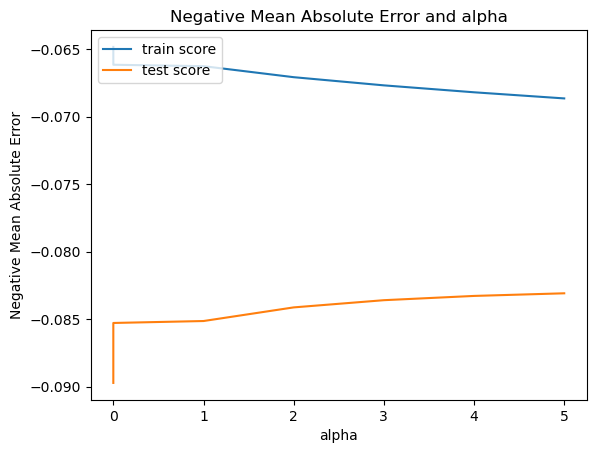

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [68]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.11292099e-04,  4.17361558e-04,  2.51345010e-06,  4.84790597e-02,
        4.56681835e-02, -1.07900437e-05,  7.22681282e-05,  4.82729500e-05,
        9.07377813e-05,  6.53797722e-05,  6.98231972e-05,  8.45051353e-05,
        2.19708103e-04,  2.21820606e-02, -3.77287647e-03,  1.52020760e-02,
        2.37554143e-02,  2.14256859e-04, -2.00481257e-02,  5.30755470e-03,
        9.74420847e-05,  1.14252230e-04, -1.85685087e-05,  2.09094863e-04,
        1.98443138e-04,  2.68207130e-04,  2.70401521e-04, -2.39396066e-03,
        1.48747868e-01,  1.04689569e-01,  1.25047936e-01,  9.68961264e-02,
        2.20112136e-03, -2.11227827e-02,  3.90140984e-04,  1.22899257e-02,
       -2.09223651e-02,  2.98689265e-03,  1.73190807e-02, -2.13116810e-02,
       -5.12064325e-02, -2.39644553e-02,  1.02053196e-02, -3.92669695e-02,
       -1.47888140e-02, -2.27156073e-02,  1.00551146e-02,  3.67619120e-02,
       -8.06111255e-03,  1.14361126e-01, -5.57398427e-02, -9.80869246e-03,
       -8.48178582e-02, -

In [69]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(X.columns, ridge.coef_))

In [70]:
para_ridge = pd.DataFrame(mod_ridge)
para_ridge.columns = ['Variable', 'Coeff']
para_ridge.head()

,Variable,Coeff
0,MSSubClass,-0.000411
1,LotFrontage,0.000417
2,LotArea,0.000003
3,OverallQual,0.048479
4,OverallCond,0.045668


In [71]:
# sort the coefficients in ascending order
para_ridge = para_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
para_ridge.head()

,Variable,Coeff
28,MSZoning_FV,0.148748
30,MSZoning_RL,0.125048
49,Neighborhood_Crawfor,0.114361
29,MSZoning_RH,0.104690
31,MSZoning_RM,0.096896


In [72]:
# Chose variables whose coefficients are non-zero
pred_ridge = pd.DataFrame(para_ridge[(para_ridge['Coeff'] != 0)])
pred_ridge.shape

(207, 2)

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr_train: ", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr_test: ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: ", mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr:  0.9364559033015118
r2_test_lr:  0.9134738963824593
rss1_lr_train:  9.483481238402838
rss2_lr_test:  5.308977339575961
mse_train_lr:  0.009483481238402838
mse_test_lr:  0.012375238553790118


### Lasso

In [74]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.064951,0.011068,0.004807,0.000680,0.0001,{'alpha': 0.0001},-0.089963,-0.078705,-0.088491,-0.085716,...,-0.084014,0.005158,2,-0.065789,-0.068108,-0.065286,-0.066276,-0.067624,-0.066617,0.001078
1,0.013347,0.002166,0.003510,0.000462,0.001,{'alpha': 0.001},-0.082642,-0.083162,-0.088480,-0.082312,...,-0.083325,0.002791,1,-0.075428,-0.076726,-0.074485,-0.076791,-0.075938,-0.075873,0.000860
2,0.008092,0.003039,0.003274,0.000812,0.01,{'alpha': 0.01},-0.087849,-0.095092,-0.098751,-0.091776,...,-0.092456,0.004038,3,-0.090188,-0.088400,-0.087694,-0.089156,-0.089580,-0.089004,0.000876
3,0.043588,0.008449,0.003808,0.000808,0.05,{'alpha': 0.05},-0.098546,-0.106647,-0.107671,-0.104206,...,-0.104719,0.003288,4,-0.101148,-0.100525,-0.100811,-0.102692,-0.102425,-0.101520,0.000875
4,0.027237,0.005518,0.002695,0.000398,0.1,{'alpha': 0.1},-0.111288,-0.121801,-0.122362,-0.119348,...,-0.119174,0.004071,5,-0.117874,-0.115796,-0.114978,-0.116874,-0.116182,-0.116341,0.000981


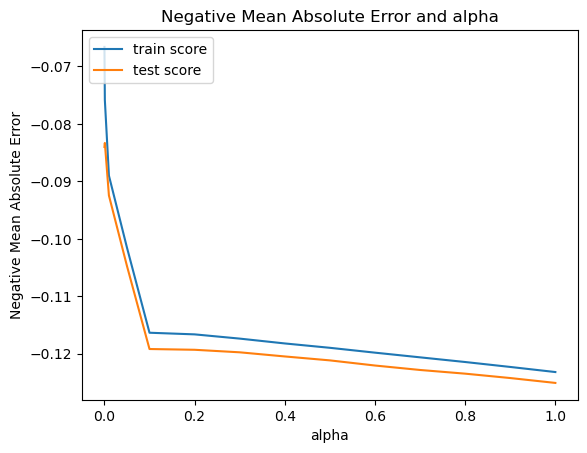

In [76]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [77]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [78]:
lasso.coef_

array([-4.48790842e-04,  6.09624622e-04,  2.29436046e-06,  7.30309626e-02,
        5.09354796e-02, -1.47345792e-05,  1.13569875e-04,  4.55313784e-05,
        1.12893896e-04,  2.40869638e-04,  2.59064082e-04,  1.01998394e-04,
        6.43544090e-05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.12090817e-03, -0.00000000e+00,  6.00440313e-03,
        1.69312809e-04,  1.54371741e-04,  3.09862788e-05,  1.73790796e-04,
        3.89199737e-04,  3.73377428e-04,  2.02028764e-04, -3.91107979e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr_train: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr_test: ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr:  0.8869910720474989
r2_test_lr:  0.8908480485105312
rss1_lr_train:  16.86573739642224
rss2_lr_test:  6.697230232271899
mse_train_lr:  0.01686573739642224
mse_test_lr:  0.015611259282685079


In [80]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(X.columns, lasso.coef_))

In [81]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,MSSubClass,-0.000449
1,LotFrontage,0.000610
2,LotArea,0.000002
3,OverallQual,0.073031
4,OverallCond,0.050935


In [82]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
3,OverallQual,0.073031
4,OverallCond,0.050935
19,Fireplaces,0.006004
174,FireplaceQu_Gd,0.004566
1,LotFrontage,0.000610
24,3SsnPorch,0.000389
25,ScreenPorch,0.000373
10,2ndFlrSF,0.000259
9,1stFlrSF,0.000241
26,PoolArea,0.000202


In [83]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred.shape

(24, 2)

In [85]:
pred

,Variable,Coeff
3,OverallQual,0.073031
4,OverallCond,0.050935
19,Fireplaces,0.006004
174,FireplaceQu_Gd,0.004566
1,LotFrontage,0.000610
24,3SsnPorch,0.000389
25,ScreenPorch,0.000373
10,2ndFlrSF,0.000259
9,1stFlrSF,0.000241
26,PoolArea,0.000202


In [84]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.939759,0.936456,0.886991
1,R2 Score (Test),0.908757,0.913474,0.890848
2,RSS (Train),8.990495,9.483481,16.865737
3,RSS (Test),5.598378,5.308977,6.697230
4,MSE (Train),0.094818,0.097383,0.129868
5,MSE (Test),0.114236,0.111244,0.124945


### Observation:
#### Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test, 
#### it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
#### the predictive variables.
#### It is always advisable to use simple yet robust model.

#### The higher values of positive coeeficients suggest a high sale value.

#### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  | 
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  Fireplaces  |  Number of fireplaces  |
 |  FireplaceQu_Gd   |Good - Masonry Fireplace in main level  |
 |  LotFrontage  |  Linear feet of street connected to property  |
        
#### The higher values of negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  PropAge  |  Age of the property at the time of seeling  |
   |  BedroomAbvGr  | Bedrooms above grade  |
   |  MSSubClass  |  Identifies the type of dwelling involved in the sale  |
    

#### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.